# Kornia - an Open Source Differentiable Computer Vision Library for PyTorch
> an Introduction to Differentiable Computer Vision
- toc: false 
- badges: true
- branch: master
- comments: false
- hide: false
- search_exclude: false
- categories: [computer vision, differentiable operators, pytorch]

![](https://github.com/kornia/cv-blog/blob/master/_notebooks/kornia-library_imgs/kornia_logo.png?raw=1)


**What is Kornia?** Kornia \cite{eribakornia2020, eribakorniasurvey2020} can be defined as a computer vision library for PyTorch \cite{paszkepytorch2017}, inspired by OpenCV and with strong GPU support. Kornia allows users to write code as if they were using native PyTorch providing high-level interfaces to vision algorithms computed directly on tensors. In addition, some of the main PyTorch features are inherited by Kornia such as a high-performance environment with easy access to automatic differentiation, executing models on different devices (CPU, GPU or Tensor Processing Unit — TPU), parallel programming by default, communication primitives for multi-process parallelism across several computation nodes and code ready for production.

![](https://raw.githubusercontent.com/kornia/kornia/master/docs/source/_static/img/hakuna_matata.gif)

**Differentiable.** Any image processing algorithm that can be defined as a Direct Acyclic Graph (DAG) structure can be incorporated in a neural network and can be optimized during training, making use of the reverse-mode auto-differentiation, compute gradients via backpropagation. In practice, this means that computer vision functions are operators that can be placed as layers within the neural networks for training via backpropagating through them.

**Transparent API.** A key component in the library design is its easy way to seamlessly add hardware acceleration to your program with a minimum effort. The library API is agnostic to the input source device, meaning that the algorithms can either be executed in several device types such as CPU, GPU, or the recently introduced TPU.

**Parallel programming.** Batch processing is another important feature that enables to run vision operators using data parallelism by default. The assumption for the operators is to receive N-channel image tensors as input batches, contrary to standard vision libraries with single 1-3 channel images. Hence, working with multispectral, hyperspectral, or volumetric images can be done in a straight-forward manner using Kornia.

**Distributed.** Support for communication primitives for multi-process parallelism across several computation nodes running on one or more groups of local or cloud-based machines. The library design allows users to run their applications in different distributed systems, or even able to process large vision pipelines in an efficient way.

**Production.** Since version v1.0.0, PyTorch has the feature to serialize and optimize models for production purposes. Based on its just-in-time (JIT) compiler, PyTorch traces the models, creating TorchScript programs at runtime in order to be run in a standalone C++ program using kernel fusion to do faster inference. This makes our library a perfect fit also for built-in vision products. 

# Library Structure

The internal structure of the library is designed to cover different computer vision areas, including color conversions, low-level image processing, geometric transformations, and some utilities for training such as specific loss functions, conversions between data layouts for different frameworks, or functionalities to easily visualize images and debug models during training.

![](https://github.com/kornia/data/raw/main/kornia_paper_mosaic.png)

| **Component** | **Description** |
|-|-|
| [kornia](https://kornia.readthedocs.io/en/latest/index.html) | a Differentiable Computer Vision library like OpenCV, with strong GPU support |
| [kornia.augmentation](https://kornia.readthedocs.io/en/latest/augmentation.html) | a module to perform data augmentation in the GPU |
| [kornia.color](https://kornia.readthedocs.io/en/latest/color.html) | a set of routines to perform color space conversions |
| [kornia.contrib](https://kornia.readthedocs.io/en/latest/contrib.html) | a compilation of user contrib and experimental operators |
| [kornia.enhance](https://kornia.readthedocs.io/en/latest/enhance.html) | a module to perform normalization and intensity transformations |
| [kornia.feature](https://kornia.readthedocs.io/en/latest/feature.html) | a module to perform feature detection |
| [kornia.filters](https://kornia.readthedocs.io/en/latest/filters.html) | a module to perform image filtering and edge detection |
| [kornia.geometry](https://kornia.readthedocs.io/en/latest/geometry.html) | a geometric computer vision library to perform image transformations, 3D linear algebra and conversions using different camera models |
| [kornia.losses](https://kornia.readthedocs.io/en/latest/losses.html) | a stack of loss functions to solve different vision tasks |
| [kornia.utils](https://kornia.readthedocs.io/en/latest/utils.html) | image to tensor utilities and metrics for vision problems |
| [kornia.morphology](https://kornia.readthedocs.io/en/latest/morphology.html) | a module to perform morphological operations |

You can find a more detailed explanation about the project on the following YouTube video:

> youtube: https://youtu.be/AAZa-mXjYF0

# Getting started

Kornia is public available in GitHub {% fn 1 %} with an Apache License 2.0 and can be installed in any Linux, MacOS or Windows operating system, having PyTorch as a single dependency, through the Python Package Index (PyPI) using the following command:

In [1]:
%%capture
pip install kornia

In the following example we are going to show how to perform a rotation to an image using Kornia and other Python libraries such OpenCV, Numpy and Matplotlib. First, we'll install this dependencies.

In [2]:
%%capture
pip install opencv-python matplotlib

Import the needed package and download an image

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import kornia as K

In [4]:
%%capture
!wget -c "https://picsum.photos/200/300" -O "image.png"

Load the image using OpenCV

In [5]:
# define the image path
img_path: str = "image.png"

# load the image using OpenCV in this case
img: np.ndarray = cv2.imread(img_path, cv2.IMREAD_COLOR)  # HxWx3
print(f"Numpy image shape: {img.shape}")

# convert the numpy array to a torch tensor
img_t: torch.Tensor = K.image_to_tensor(img, keepdim=False)  # 1x3xHxW
img_t = K.bgr_to_rgb(img_t)
img_t = img_t.float() / 255.
print(f"Tensor image shape: {img_t.shape}")

Numpy image shape: (300, 200, 3)
Tensor image shape: torch.Size([1, 3, 300, 200])


Create a tensor with the rotation angle and apply [kornia.rotate](https://kornia.readthedocs.io/en/latest/geometry.transform.html?highlight=rotate#kornia.geometry.transform.rotate) to the input image tensor

In [6]:
# define the rotation angle
angle: float = 45.  # in degrees
angle = torch.tensor(angle)

# apply the transform to the image
img_out: torch.Tensor = K.rotate(img_t, angle)  # 1x3xHxW
print(f"Output image shape: {img_t.shape}")

Output image shape: torch.Size([1, 3, 300, 200])


Display the rotated image using Matplotlib

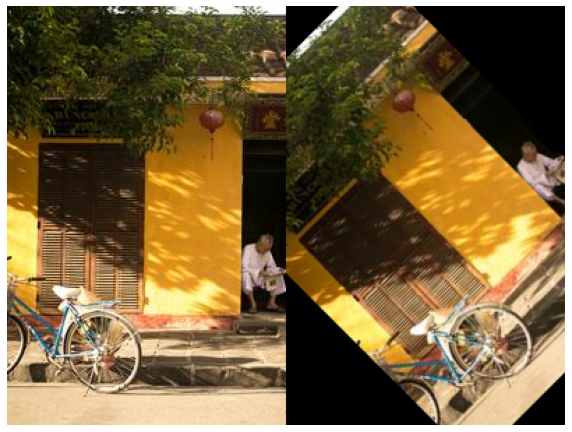

In [7]:
# concatenate the images, cast back to numpy and show
img_vis: np.ndarray = (
    K.tensor_to_image(torch.cat([img_t, img_out], dim=-1))
)

plt.figure(figsize=(10, 10))
plt.imshow(img_vis)
plt.axis('off')
plt.show()

# Summary

We have introduced Kornia, a library for computer vision in PyTorch that implements traditional vision algorithms ina differentiable manner making use of hardware acceleration to improve performance. We believe that classical computer vision libraries can take a different role within the deep learning environments as components of layers of the networks as well as pre- and post-processing of the results and change the Computer Vision paradigm.

# References

[<a id="cit-eribakornia2020" href="#call-eribakornia2020">eribakornia2020</a>] E. Riba, D. Mishkin, D. Ponsa, R. Ethan and G. Bradski, *Kornia: an open source differentiable computer vision library for PyTorch*, Winter Conference on Applications of Computer Vision (WACV), 2020.

[<a id="cit-eribakorniasurvey2020" href="#call-eribakorniasurvey2020">eribakorniasurvey2020</a>] E. Riba, D. Mishkin, J. Shi, D. Ponsa, F. Moreno-Noguer and G. Bradski. *A survey on Kornia: an open source differentiable computer vision library for PyTorch*, ArXiv, 2020.

[<a id="cit-paszkepytorch2017" href="#call-paszkepytorch2017">paszkepytorch2017</a>] A. Paszke, S. Gross, S. Chintala, G. Chanan, E. Yang, Z. DeVito, Z. Lin, A. Desmaison, L. Antiga, and A. Lerer, *Automatic differentiation in PyTorch*, NIPS-W, 2017.

## Footnotes

{{ 'Kornia GitHub: [https://github.com/kornia/kornia](https://github.com/kornia/kornia)!'  | fndetail: 1 }}